# Logistic Regression

In [59]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# Importing Dataset
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [61]:
# Splitting input and output
print(X)
print(y)

[[22]
 [25]
 [47]
 [52]
 [46]
 [56]
 [55]
 [60]
 [62]
 [61]
 [18]
 [28]
 [27]
 [29]
 [49]
 [55]
 [25]
 [58]
 [19]
 [18]
 [21]
 [26]
 [40]
 [45]
 [50]
 [54]
 [23]]
[0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0]


In [62]:
# Describing Data
dataset.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


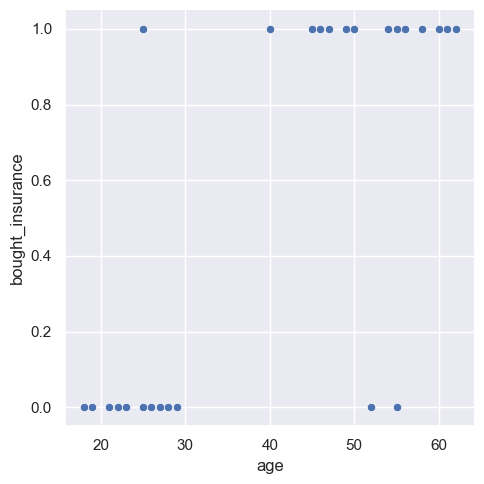

In [63]:
# Plot the graph of the given data
sns.set_theme()
sns.relplot(data=dataset, x='age', y='bought_insurance')

In [66]:
# Normalizing the data
normalized_dataset = dataset.copy()
normalized_dataset["age"] = (dataset["age"] - dataset["age"].mean())/dataset["age"].std()
dataset.head()
normalized_dataset.head()

,age,bought_insurance
0,-1.122008,0
1,-0.931479,0
2,0.465739,1
3,0.783289,0
4,0.402229,1


In [68]:
print(normalized_dataset)

         age  bought_insurance
0  -1.122008                 0
1  -0.931479                 0
2   0.465739                 1
3   0.783289                 0
4   0.402229                 1
5   1.037329                 1
6   0.973819                 0
7   1.291368                 1
8   1.418388                 1
9   1.354878                 1
10 -1.376048                 0
11 -0.740949                 0
12 -0.804459                 0
13 -0.677439                 0
14  0.592759                 1
15  0.973819                 1
16 -0.931479                 1
17  1.164348                 1
18 -1.312538                 0
19 -1.376048                 0
20 -1.185518                 0
21 -0.867969                 0
22  0.021170                 1
23  0.338720                 1
24  0.656269                 1
25  0.910309                 1
26 -1.058499                 0


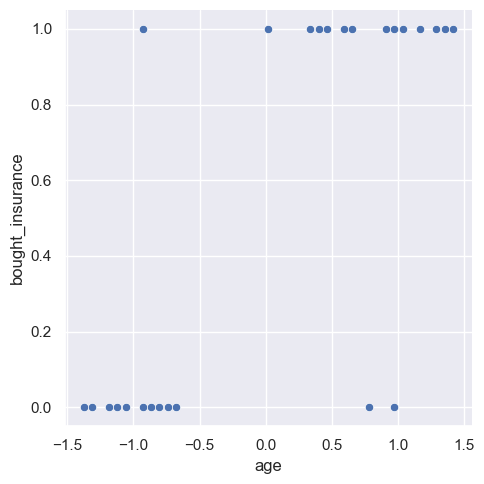

In [69]:
# Plot the graph of the given data
sns.set_theme()
sns.relplot(data=normalized_dataset, x='age', y='bought_insurance')

In [70]:
# Make a function that gives you the logistic value
def returnLogisticValue(z: int):
    return (1/(1+np.exp(-z)))

In [71]:
# We write a function to calculate log likelihood, and here, target_values is the target value and y_n is the predicted value
def logLikelihood(target_values, predicted_values):
    logLikelihood = -np.mean(target_values*(np.log(predicted_values)) - (1-target_values)*np.log(1-predicted_values))
    return logLikelihood

In [72]:
# We need to write a function to find gradients
def gradient(target_value: int, predicted_value: int, input_value: int):
    gradient = np.mean((predicted_value - target_value)*input_value)
    return gradient

In [73]:
def train_model(input, target_values, learning_rate, epochs):
    w = 0
    for epoch in range(epochs):
        for i in range(input.shape[0]):
            predicted_value = returnLogisticValue(input[i])
            dw = gradient(target_value=target_values[i], predicted_value=predicted_value, input_value=input[i])
            w -= learning_rate*dw
        print(f'Epoch: {epoch}, w: {w}, loss: {logLikelihood(target_values=target_values, predicted_values=returnLogisticValue(input))}')
    return w

In [74]:
X = normalized_dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
w = train_model(input=X, target_values=y, learning_rate=0.02, epochs=1000)

Epoch: 0, w: 0.07637859180651228, loss: 0.029906688899273882
Epoch: 1, w: 0.15275718361302462, loss: 0.029906688899273882
Epoch: 2, w: 0.22913577541953695, loss: 0.029906688899273882
Epoch: 3, w: 0.30551436722604913, loss: 0.029906688899273882
Epoch: 4, w: 0.38189295903256126, loss: 0.029906688899273882
Epoch: 5, w: 0.4582715508390734, loss: 0.029906688899273882
Epoch: 6, w: 0.5346501426455856, loss: 0.029906688899273882
Epoch: 7, w: 0.6110287344520979, loss: 0.029906688899273882
Epoch: 8, w: 0.6874073262586102, loss: 0.029906688899273882
Epoch: 9, w: 0.7637859180651225, loss: 0.029906688899273882
Epoch: 10, w: 0.8401645098716348, loss: 0.029906688899273882
Epoch: 11, w: 0.9165431016781471, loss: 0.029906688899273882
Epoch: 12, w: 0.9929216934846594, loss: 0.029906688899273882
Epoch: 13, w: 1.0693002852911713, loss: 0.029906688899273882
Epoch: 14, w: 1.1456788770976833, loss: 0.029906688899273882
Epoch: 15, w: 1.2220574689041954, loss: 0.029906688899273882
Epoch: 16, w: 1.2984360607107

<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

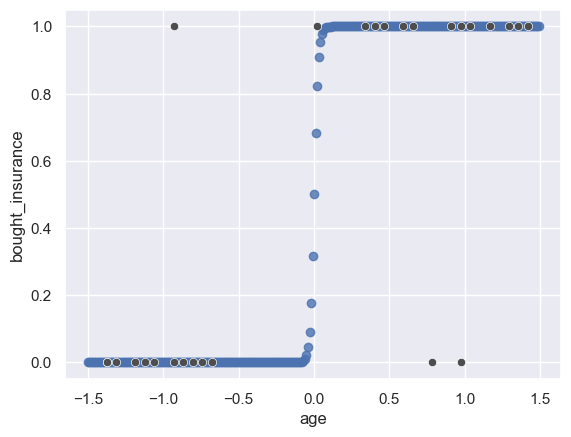

In [76]:
fig, ax = plt.subplots()
sns.regplot(x=np.arange(-1.5, 1.5, 0.01), y=returnLogisticValue(w*np.arange(-1.5, 1.5, 0.01)), fit_reg=False, ax=ax)
sns.scatterplot(data=normalized_dataset, x='age', y='bought_insurance', ax=ax, color=".3")

In [77]:
# Write a prediction function
def predict(x: int):
    x = (x - dataset["age"].mean())/dataset["age"].std()
    print(x)
    prob = returnLogisticValue(w*x)
    if(prob > 0.5):
        print("The person will buy the insurance")
    else:
        print("The person will not buy the insurance")

In [79]:
predict(50)

0.6562691094358506
The person will buy the insurance
